In [1]:
import tensorflow as tf
print('TF Version:', tf.__version__)


/home/wah/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/wah/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/wah/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/wah/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:496: FutureWarnin

In [2]:
import keras
print('Keras Version:', keras.__version__)


Keras Version: 2.1.6
Using TensorFlow backend.


In [3]:
import PIL
print('Pillow Version:', PIL.__version__)


Pillow Version: 7.1.2


In [4]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('raw_data_set/image00001.jpeg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()


JPEG
RGB
(769, 480)


uint8
(480, 769, 3)


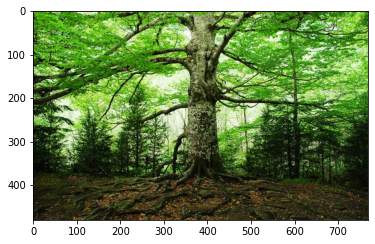

In [5]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('raw_data_set/image00001.jpeg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()


In [6]:
# # load all images in a directory
from os import listdir
from matplotlib import image
# # load all images in a directory
# file_list = list()
# for filename in listdir('raw_data_set'):
# 	# load image
# 	img_data = image.imread('raw_data_set/' + filename)
# 	# store loaded image
# 	file_list.append(img_data)
# 	print('> loaded %s %s' % (filename, img_data.shape))


In [7]:
file_list = list()
for filename in listdir('raw_data_set'):
    file_list.append(filename)


In [8]:
import keras 
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

vgg16 = VGG16(weights='imagenet', include_top=True)
vgg16.graph = tf.get_default_graph()
vgg16.output_shape


(None, 1000)

In [9]:
print(file_list)


['image00001.jpeg', 'image00002.jpeg', 'image00003.jpeg', 'image00004.jpeg', 'image00005.jpeg', 'image00006.jpeg', 'image00007.jpeg', 'image00008.jpeg', 'image00009.jpeg', 'image00010.jpeg', 'image00011.jpeg', 'image00012.jpeg', 'image00013.jpeg', 'image00014.jpeg', 'image00015.jpeg', 'image00016.jpeg', 'image00017.jpeg', 'image00018.jpeg', 'image00019.jpeg', 'image00020.jpeg', 'image00021.jpeg', 'image00022.jpeg', 'image00023.jpeg', 'image00024.jpeg', 'image00025.jpeg', 'image00026.jpeg', 'image00027.jpeg', 'image00028.jpeg', 'image00029.jpeg', 'image00030.jpeg', 'image00031.jpeg', 'image00032.jpeg', 'image00033.jpeg', 'image00034.jpeg', 'image00035.jpeg', 'image00036.jpeg', 'image00037.jpeg', 'image00038.jpeg', 'image00039.jpeg', 'image00040.jpeg', 'image00041.jpeg', 'image00042.jpeg', 'image00043.jpeg', 'image00044.jpeg', 'image00045.jpeg', 'image00046.jpeg', 'image00047.jpeg', 'image00048.jpeg', 'image00049.jpeg', 'image00050.jpeg', 'image00051.jpeg', 'image00052.jpeg', 'image00053

In [10]:
from sklearn.model_selection import train_test_split
train_files,test_files =train_test_split(file_list, 
                                            test_size=0.05,  
                                            random_state=42)
len(train_files),len(test_files)


(763, 41)

In [11]:

print(train_files)


['image00660.jpeg', 'image00661.jpeg', 'image00138.jpeg', 'image00598.jpeg', 'image00211.jpeg', 'image00529.jpeg', 'image00389.jpeg', 'image00396.jpeg', 'image00569.jpeg', 'image00513.jpeg', 'image00452.jpeg', 'image00200.jpeg', 'image00671.jpeg', 'image00301.jpeg', 'image00760.jpeg', 'image00600.jpeg', 'image00087.jpeg', 'image00706.jpeg', 'image00549.jpeg', 'image00725.jpeg', 'image00604.jpeg', 'image00121.jpeg', 'image00232.jpeg', 'image00672.jpeg', 'image00228.jpeg', 'image00707.jpeg', 'image00050.jpeg', 'image00097.jpeg', 'image00156.jpeg', 'image00376.jpeg', 'image00712.jpeg', 'image00197.jpeg', 'image00800.jpeg', 'image00034.jpeg', 'image00032.jpeg', 'image00597.jpeg', 'image00753.jpeg', 'image00328.jpeg', 'image00759.jpeg', 'image00210.jpeg', 'image00623.jpeg', 'image00586.jpeg', 'image00073.jpeg', 'image00078.jpeg', 'image00282.jpeg', 'image00514.jpeg', 'image00368.jpeg', 'image00251.jpeg', 'image00486.jpeg', 'image00418.jpeg', 'image00352.jpeg', 'image00553.jpeg', 'image00330

In [12]:
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img

import scipy as sp
import scipy.ndimage as spi
import numpy as np

def prep_data(file_list=[],
              dir_path=None,
              dim_x=256,
              dim_y=256):
    #Get images
    X = []
    for filename in file_list:
        X.append(img_to_array(
            sp.misc.imresize(
                load_img('raw_data_set/' + filename),
                (dim_x, dim_y))
            )
        )
    X = np.array(X, dtype=np.float64)
    X = 1.0/255*X
    return X


In [13]:
DIM = 256
X_train = prep_data(file_list=train_files,
                    dir_path='',
                    dim_x=DIM,dim_y=DIM)


/home/wah/cohort9-group-project-2/cw/20200619/20200619-trial.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  print(image.mode)


In [14]:
from keras.engine import Layer
from keras.layers import Reshape, merge, concatenate
from keras.layers import Input,Activation, Dense, Dropout, Flatten
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose 

from keras.layers.core import RepeatVector, Permute
from keras.layers.normalization import BatchNormalization

from keras.callbacks import TensorBoard 

from keras.models import Sequential, Model

emd_input = Input(shape=(1000,))

#Encoder
enc_input = Input(shape=(DIM, DIM, 1,))
enc_output = Conv2D(64, (3,3), 
                        activation='relu', 
                        padding='same', strides=2)(enc_input)
enc_output = Conv2D(128, (3,3), 
                        activation='relu', 
                        padding='same')(enc_output)
enc_output = Conv2D(128, (3,3), 
                        activation='relu', 
                        padding='same', strides=2)(enc_output)
enc_output = Conv2D(256, (3,3), 
                        activation='relu', 
                        padding='same')(enc_output)
enc_output = Conv2D(256, (3,3), 
                        activation='relu', 
                        padding='same', strides=2)(enc_output)
enc_output = Conv2D(512, (3,3), 
                        activation='relu', 
                        padding='same')(enc_output)
enc_output = Conv2D(512, (3,3), 
                        activation='relu', 
                        padding='same')(enc_output)
enc_output = Conv2D(256, (3,3), 
                        activation='relu', 
                        padding='same')(enc_output)

#Fusion
fusion_layer_output = RepeatVector(32*32)(emd_input) 
fusion_layer_output = Reshape(([32,32, 
                          1000]))(fusion_layer_output)
fusion_layer_output = concatenate([enc_output, 
                                   fusion_layer_output], axis=3) 
fusion_layer_output = Conv2D(DIM, (1, 1), 
                       activation='relu', 
                       padding='same')(fusion_layer_output) 

#Decoder
dec_output = Conv2D(128, (3,3), 
                        activation='relu', 
                        padding='same')(fusion_layer_output)
dec_output = UpSampling2D((2, 2))(dec_output)
dec_output = Conv2D(64, (3,3), 
                        activation='relu', 
                        padding='same')(dec_output)
dec_output = UpSampling2D((2, 2))(dec_output)
dec_output = Conv2D(32, (3,3), 
                        activation='relu', 
                        padding='same')(dec_output)
dec_output = Conv2D(16, (3,3), 
                        activation='relu', 
                        padding='same')(dec_output)
dec_output = Conv2D(2, (3, 3), 
                        activation='tanh', 
                        padding='same')(dec_output)
dec_output = UpSampling2D((2, 2))(dec_output)

model = Model(inputs=[enc_input, emd_input], outputs=dec_output)


In [15]:
#Generate training data
BATCH_SIZE = 32
EPOCH= 100
STEPS_PER_EPOCH = 2


In [16]:
import scipy as sp
import scipy.ndimage as spi

from skimage.io import imsave,imshow
from skimage.transform import resize
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb

import matplotlib.pyplot as plt

#Create embedding
def create_vgg_embedding(grayscaled_rgb):
    gs_rgb_resized = []
    for i in grayscaled_rgb:
        i = resize(i, (224, 224, 3), 
                   mode='constant')
        gs_rgb_resized.append(i)
    gs_rgb_resized = np.array(gs_rgb_resized)
    gs_rgb_resized = preprocess_input(gs_rgb_resized)
    with vgg16.graph.as_default():
      embedding = vgg16.predict(gs_rgb_resized)
    return embedding

# Image transformer
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

def colornet_img_generator(X,
                  batch_size=BATCH_SIZE):
    for batch in datagen.flow(X, batch_size=batch_size):
        gs_rgb = gray2rgb(rgb2gray(batch))
        batch_lab = rgb2lab(batch)
        
        batch_l = batch_lab[:,:,:,0]
        batch_l = batch_l.reshape(batch_l.shape+(1,))
        
        batch_ab = batch_lab[:,:,:,1:] / 128
        yield ([batch_l, 
                create_vgg_embedding(gs_rgb)], batch_ab)


In [17]:
model.compile(optimizer='adam', loss='mse')


In [18]:
history = model.fit_generator(colornet_img_generator(X_train,
                                                     BATCH_SIZE), 
                              epochs=EPOCH, 
                              steps_per_epoch=STEPS_PER_EPOCH)


Epoch 1/100
2/2 [==============================] - 500s 250s/step - loss: 0.4581
Epoch 2/100
2/2 [==============================] - 393s 197s/step - loss: 0.7435
Epoch 3/100
2/2 [==============================] - 411s 205s/step - loss: 0.0605
Epoch 4/100
2/2 [==============================] - 290s 145s/step - loss: 0.0163
Epoch 5/100
2/2 [==============================] - 265s 132s/step - loss: 0.0219
Epoch 6/100
2/2 [==============================] - 252s 126s/step - loss: 0.0173
Epoch 7/100
2/2 [==============================] - 226s 113s/step - loss: 0.0205
Epoch 8/100
2/2 [==============================] - 239s 120s/step - loss: 0.0161
Epoch 9/100
2/2 [==============================] - 301s 151s/step - loss: 0.0192
Epoch 10/100
2/2 [==============================] - 244s 122s/step - loss: 0.0201
Epoch 11/100
2/2 [==============================] - 252s 126s/step - loss: 0.0203
Epoch 12/100
2/2 [==============================] - 242s 121s/step - loss: 0.0191
Epoch 13/100
2/2 [=======

In [19]:
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 640         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 128 73856       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 64, 64, 128)  147584      conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

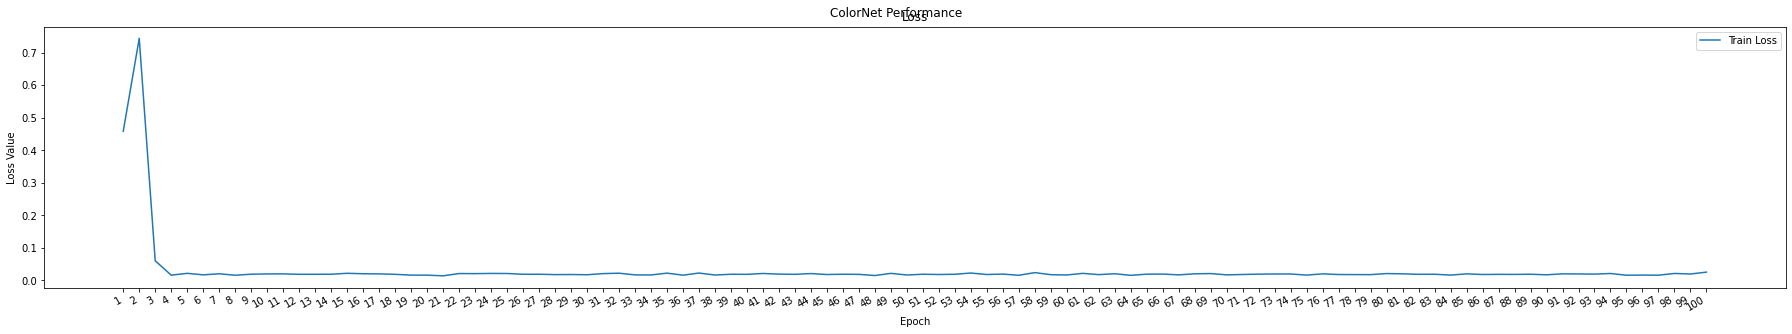

In [20]:
f, (ax2) = plt.subplots(1, 1, figsize=(25, 5))
t = f.suptitle('ColorNet Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,EPOCH+1))

ax2.plot(epochs, history.history['loss'], label='Train Loss')
#ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

plt.tight_layout()
f.autofmt_xdate()
plt.show()


In [21]:
import random

three_test_files = random.choices(test_files, k =3)
for filename in three_test_files:
    print(filename)
    

image00447.jpeg
image00079.jpeg
image00031.jpeg


In [22]:
#Make predictions on validation images
IMG_DIR = 'raw_data_set/'
sample_img = []
for filename in three_test_files:
    sample_img.append(sp.misc.imresize(load_img(IMG_DIR+filename), 
                                     (DIM, DIM)))
sample_img = np.array(sample_img, 
                    dtype=float)
sample_img = 1.0/255*sample_img
sample_img = gray2rgb(rgb2gray(sample_img))

sample_img = rgb2lab(sample_img)[:,:,:,0]
sample_img = sample_img.reshape(sample_img.shape+(1,))

#embedding input
sample_img_embed = create_vgg_embedding(sample_img)


/home/wah/cohort9-group-project-2/cw/20200619/20200619-trial.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import keras


In [23]:
# Test model
output_img = model.predict([sample_img, sample_img_embed])
output_img = output_img * 128


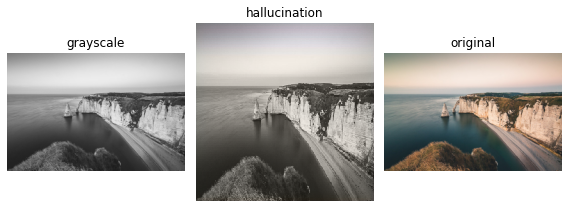

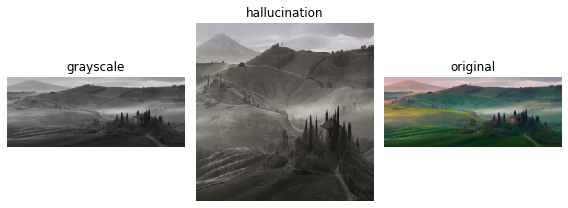

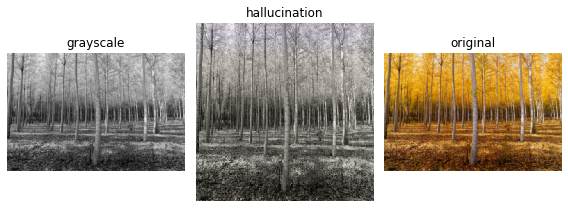

In [24]:
# filenames = test_files
filenames = three_test_files
# Output colorizations
for i in range(len(output_img)):
    fig = plt.figure(figsize=(8,8))
    final_img = np.zeros((DIM,DIM, 3))
    
    # add grayscale channel
    final_img[:,:,0] = sample_img[i][:,:,0]
    
    # add predicted channel
    final_img[:,:,1:] = output_img[i]
    
    img_obj = load_img(IMG_DIR+filenames[i])
    
    fig.add_subplot(1, 3, 1)
    plt.axis('off')
    
    grayed_img = gray2rgb(
                  rgb2gray(
                      img_to_array(
                          img_obj)/255)
                  )
    plt.imshow(grayed_img)
    plt.title("grayscale")
    
    fig.add_subplot(1, 3, 2)
    plt.axis('off')
    imshow(lab2rgb(final_img))
    plt.title("hallucination")
    
    fig.add_subplot(1, 3, 3)
    plt.imshow(img_obj)
    plt.title("original")
    plt.axis('off')
    plt.show()